## Imports

In [100]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

import hdbscan

from mpl_toolkits.mplot3d import Axes3D

from cdbw import CDbw

## Fonctions pour visualiser et lire les données

In [101]:
def load_data(filename,relative_path="./dataset/",sep="\t"):
    data=pd.read_csv(relative_path+filename,sep=sep).to_numpy()
    return data

# visualisation en 3d
def visualise_data_3d(data):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2])
    plt.show()
    
def visualise_pred_3d(data,pred):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0],data[:,1],data[:,2],c=pred)
    plt.show()
    
#visualisation des données intiales
def visualise_data(data):
    plt.title("Données initiales")
    plt.scatter(data[:,0],data[:,1],s=5)
    plt.show()

def visualise_pred(data,pred):
    plt.title("Visualisation des clusters")
    plt.scatter(data[:,0],data[:,1],c=pred,s=5)
    plt.show()
    

## Fonctions relatives aux méthodes de clustering

In [102]:
#détermine nombre de clusters pour k-Means
def sil_n_clusters(min,max,data,metric="silh"):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k, init='k-means++').fit(data)
        if metric=="cdbw":
            metric = CDbw(data, model.labels_, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False)
        else:
            metric = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<metric):
            n_cluster = k
            best = metric
    return n_cluster

def sil_n_clusters_agg(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<silh):
            n_cluster = k
            best = silh
    return n_cluster

def cdbw_n_clusters_agg(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='single').fit(data)
        cdbw = CDbw(data, model.labels_, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False)
        if (best<cdbw):
            n_cluster = k
            best = cdbw
    return n_cluster

In [103]:
def det_eps(data):
    neighbors=NearestNeighbors(n_neighbors=4)
    neighbors_fit=neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()

# Jeu de donnée a.data

## Visualisation

<IPython.core.display.Javascript object>


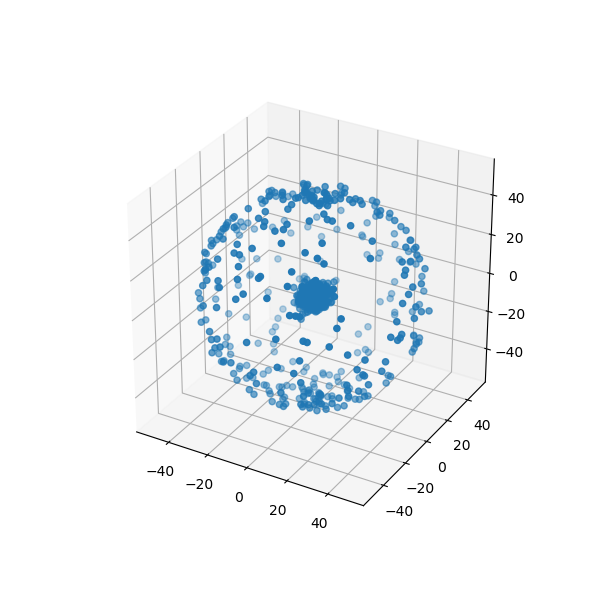

In [104]:
data1=load_data("a.data")
visualise_data_3d(data1)

## Clustering k-Means

runtime =  61.83 ms
CDbw index score:  0.005135386516200429


<IPython.core.display.Javascript object>


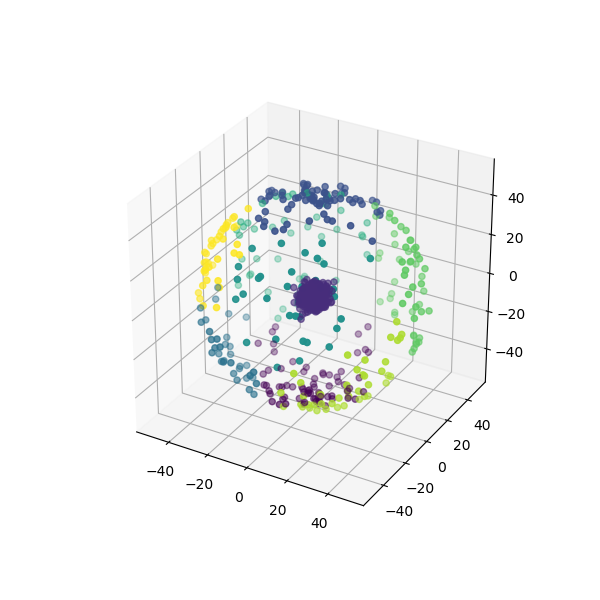

In [105]:
n_clusters=sil_n_clusters(2,9,data1,metric="cdbw")
tps1=time.time()
pred=cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit_predict(data1)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data1, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred_3d(data1,pred)

## Clustering hiérarchique (agglomératif linkage single)

runtime =  1519.93 ms
CDbw index score:  0.0021783247590632937


<IPython.core.display.Javascript object>


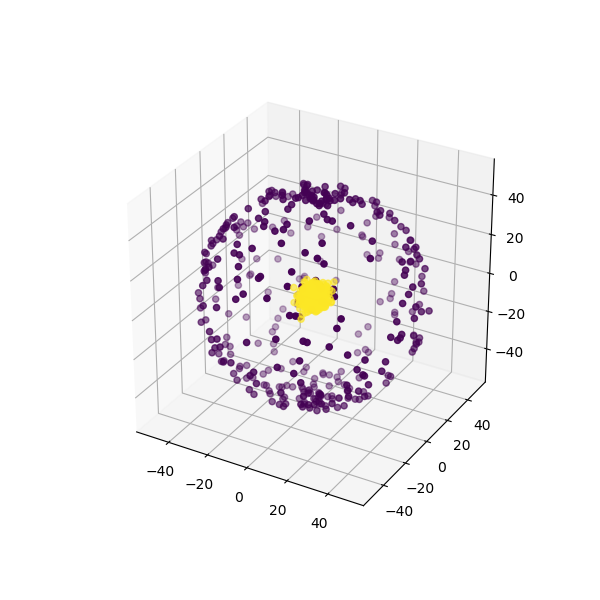

In [106]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=cdbw_n_clusters_agg(2,12,data1), linkage='single').fit_predict(data1)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data1, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred_3d(data1,pred)

## Clustering HDBSCAN

runtime =  28.95 ms
CDbw index score:  0.0021783247590632937


<IPython.core.display.Javascript object>


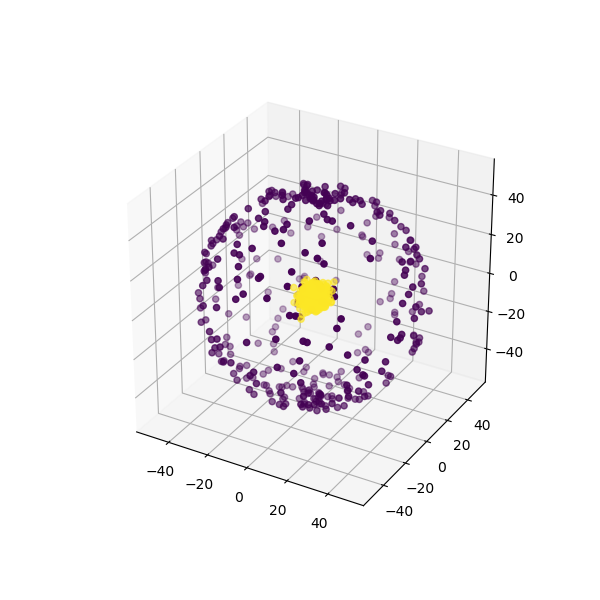

In [107]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=12).fit_predict(data1)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data1, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred_3d(data1,pred)

## Clustering DBSCAN

<IPython.core.display.Javascript object>


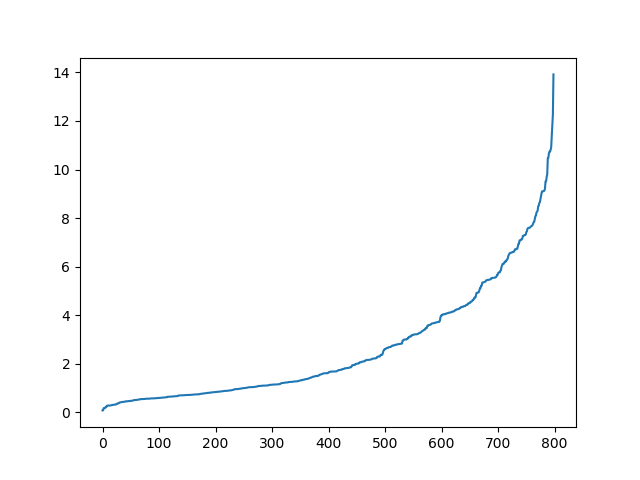

In [108]:
det_eps(data1)

runtime =  9.97 ms
CDbw index score:  0.0021783247590632937


<IPython.core.display.Javascript object>


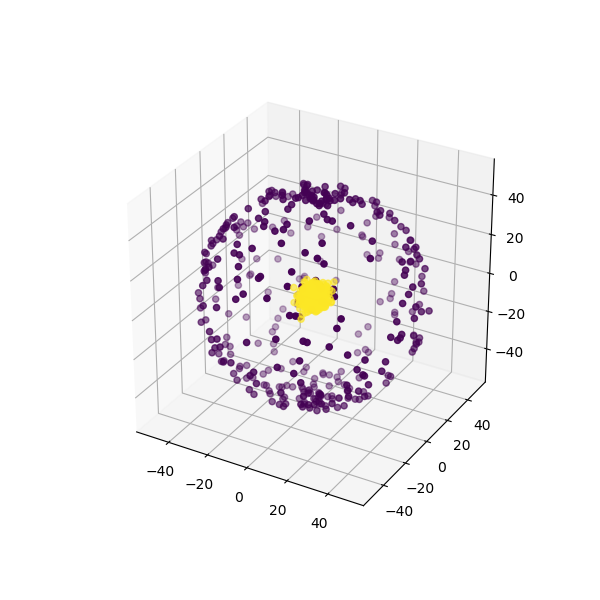

In [109]:
tps1=time.time()
pred=cluster.DBSCAN(eps=14, min_samples=3).fit_predict(data1)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data1, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred_3d(data1,pred)

# Jeu de données h.data

## Visualisation

<IPython.core.display.Javascript object>


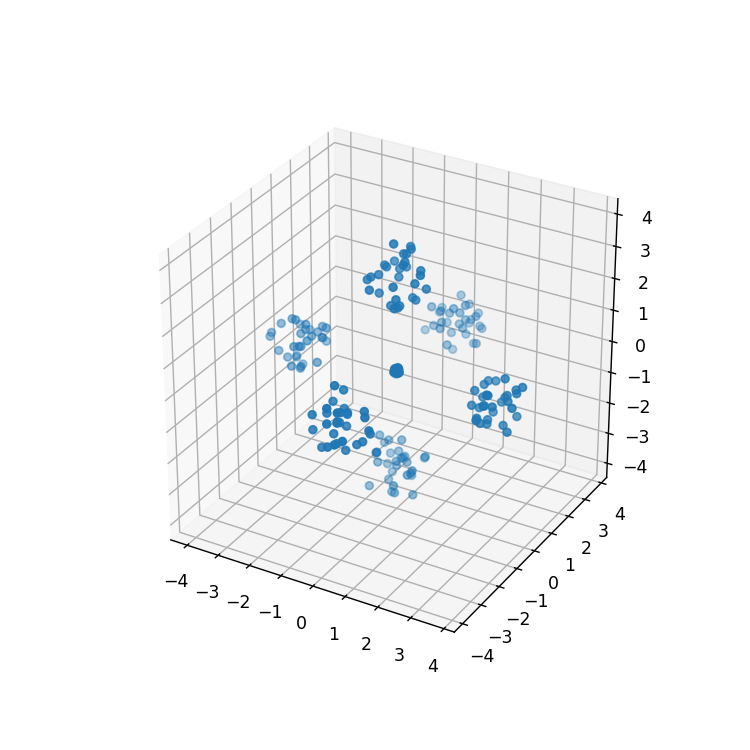

In [5]:
data2=load_data("h.data")
visualise_data_3d(data2)

## Clustering k-Means

In [111]:
tps1= time.time()
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data2),init='k-means++').fit_predict(data2)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data2, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data2,pred)

runtime =  198.44 ms
Coéfficient de silhouette : 0.7006485323074687


<IPython.core.display.Javascript object>

## Clustering hiérarchique (agglomératif avec linkage de type ward)

runtime =  29.9 ms
Coéfficient de silhouette : 0.7006485323074687


<IPython.core.display.Javascript object>


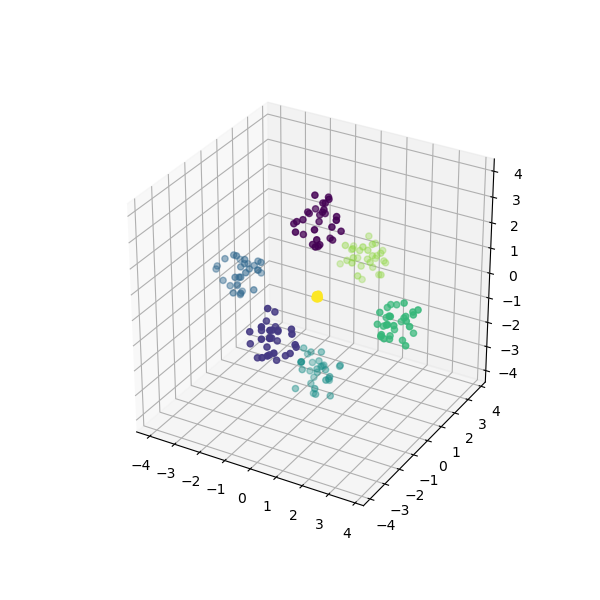

In [113]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=sil_n_clusters_agg(2,9,data2), linkage='ward').fit_predict(data2)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data2, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data2,pred)

## Clustering DBSCAN

<IPython.core.display.Javascript object>


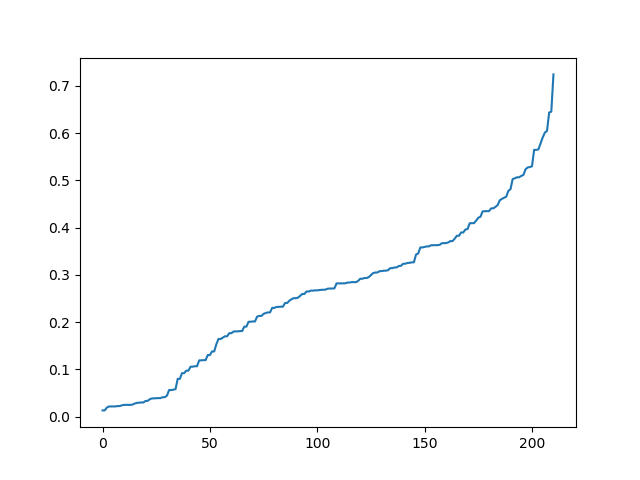

In [114]:
det_eps(data2)

runtime =  2.0 ms
Coéfficient de silhouette : 0.7006485323074687


<IPython.core.display.Javascript object>


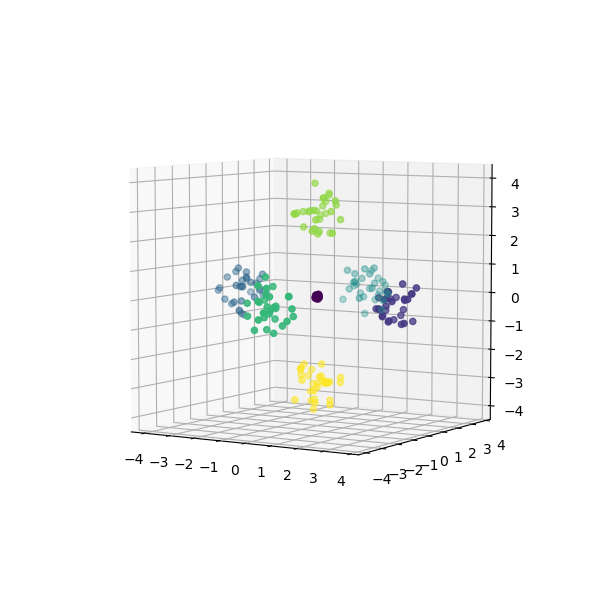

In [118]:
tps1=time.time()
pred=cluster.DBSCAN(eps=0.8, min_samples=3).fit_predict(data2)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data2, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data2,pred)

## Clustering HDBSCAN

runtime =  7.99 ms
Coéfficient de silhouette : 0.7006485323074687


<IPython.core.display.Javascript object>


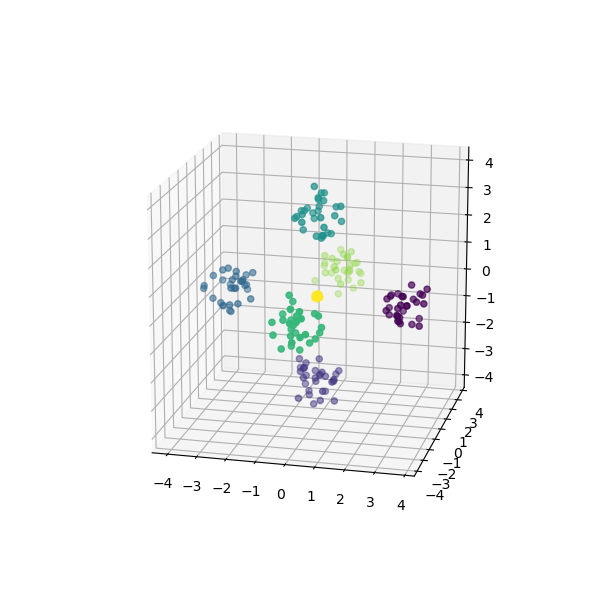

In [122]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=0.8).fit_predict(data2)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data2, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data2,pred)

# Jeu de données t.data

## Visualation

<IPython.core.display.Javascript object>


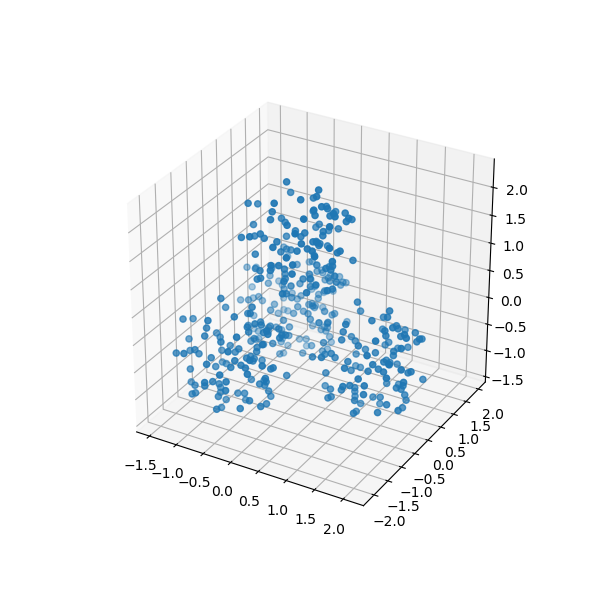

In [123]:
data3=load_data("t.data")
visualise_data_3d(data3)

## Clustering K-means

runtime =  308.17 ms
Coéfficient de silhouette : 0.5051896443563737


<IPython.core.display.Javascript object>


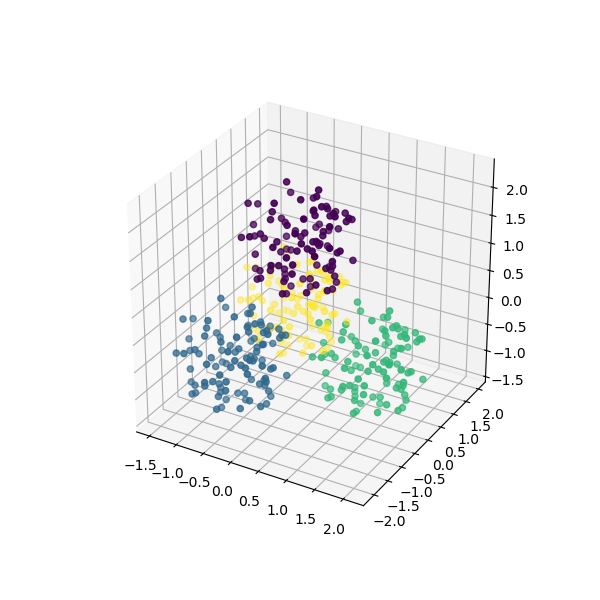

In [127]:
tps1= time.time()
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data3),init='k-means++').fit_predict(data3)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data3, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data3,pred)

## Clustering hiérarchique (agglomératique avec linkage de type ward)

runtime =  59.81 ms
Coéfficient de silhouette : 0.49457780725253114


<IPython.core.display.Javascript object>


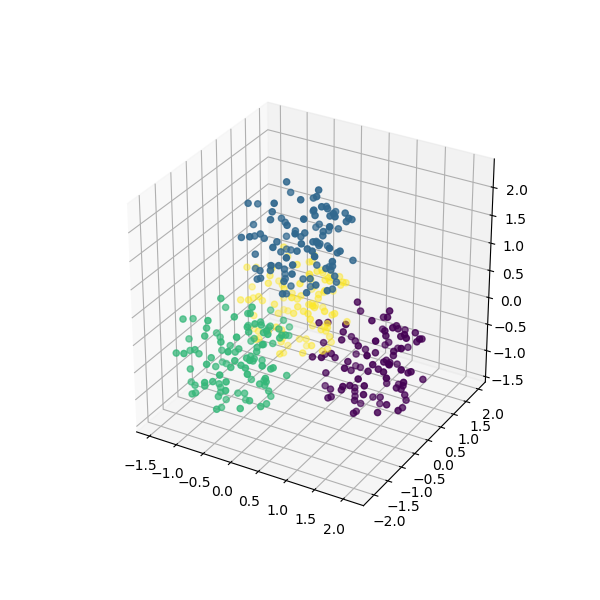

In [141]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=sil_n_clusters_agg(2,9,data3), linkage='ward').fit_predict(data3)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data3, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data3,pred)

## Clustering DBSCAN

<IPython.core.display.Javascript object>


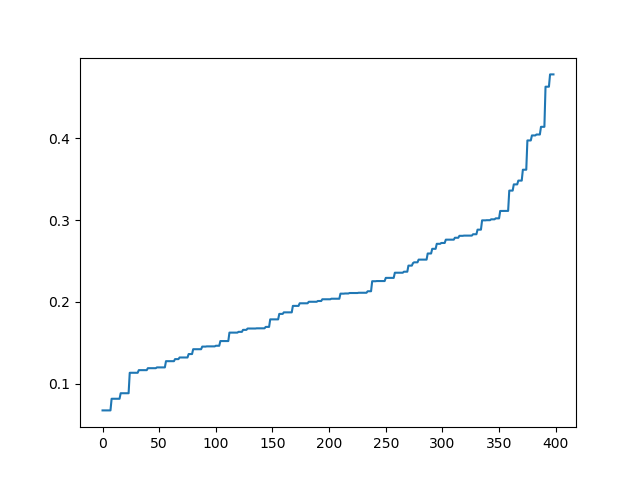

In [150]:
det_eps(data3)

runtime =  2.99 ms
Coéfficient de silhouette : 0.3136848696802465


<IPython.core.display.Javascript object>


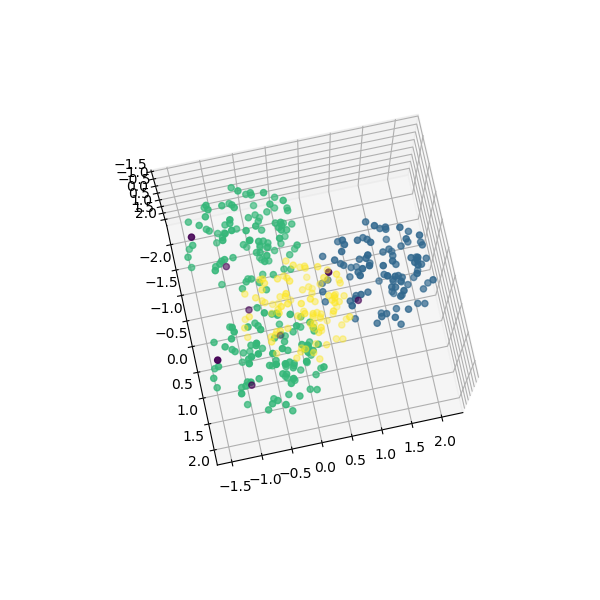

In [178]:
tps1=time.time()
pred=cluster.DBSCAN(eps=0.45, min_samples=3).fit_predict(data3)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data3, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data3,pred)

## Clustering HDBSCAN

runtime =  10.98 ms
Coéfficient de silhouette : 0.4686052958522073


<IPython.core.display.Javascript object>


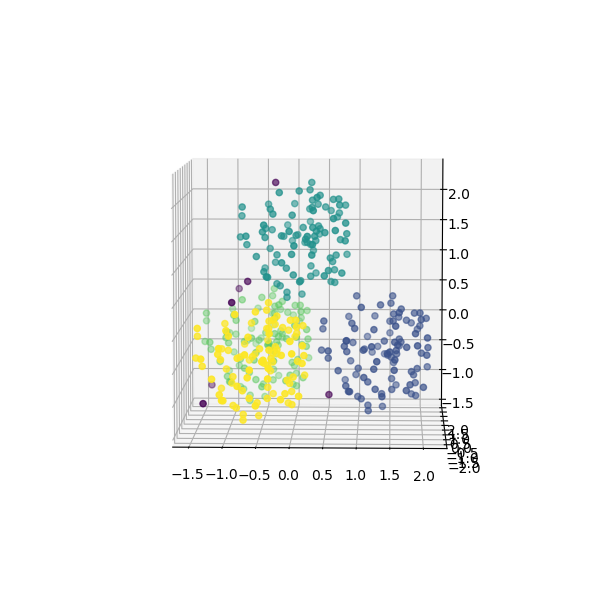

In [184]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=2, cluster_selection_epsilon=0.4).fit_predict(data3)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
silh=metrics.silhouette_score(data3, pred, metric='euclidean')
print("Coéfficient de silhouette :",silh)
visualise_pred_3d(data3,pred)

# Jeu de données tr.data

## Visualisation

<IPython.core.display.Javascript object>


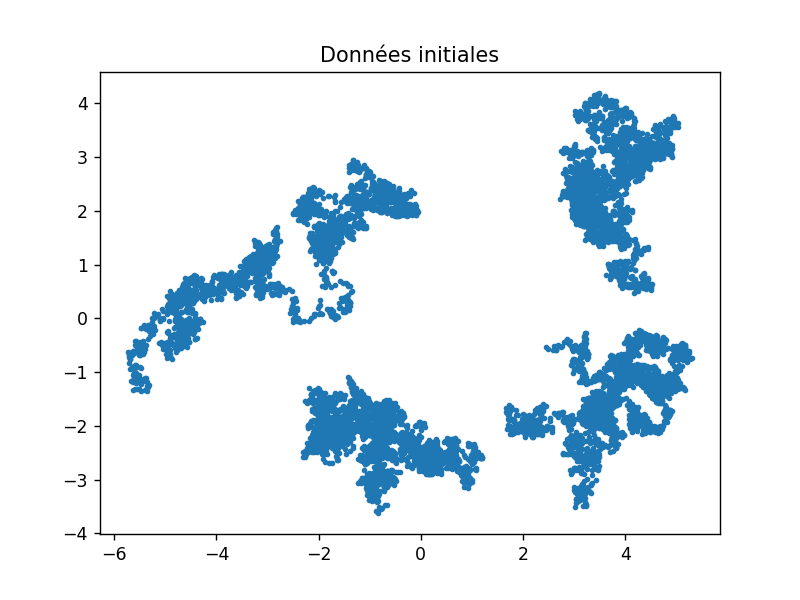

In [9]:
data4=load_data("tr.data",sep=" ")
visualise_data(data4)

## Clustering k-Means

runtime =  10740.27 ms
CDbw index score:  0.08297110637094987


<IPython.core.display.Javascript object>


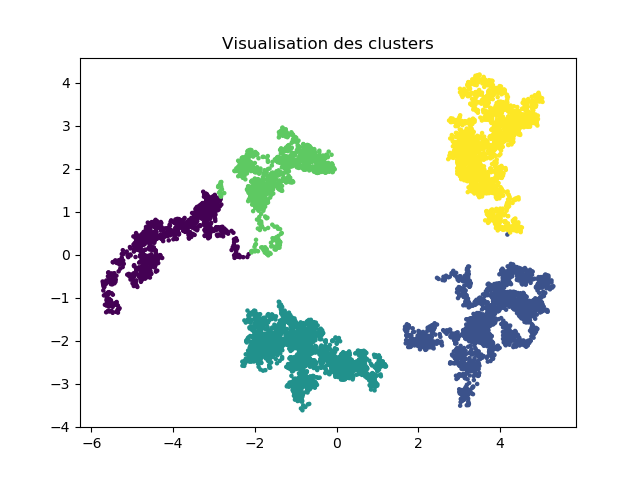

In [134]:
tps1= time.time()
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data4,metric="cdbw"),init='k-means++').fit_predict(data4)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data4, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data4,pred)

## Clustering agglomératif (linkage de type single)

runtime =  5820.11 ms
CDbw index score:  0.34798101381891816


<IPython.core.display.Javascript object>


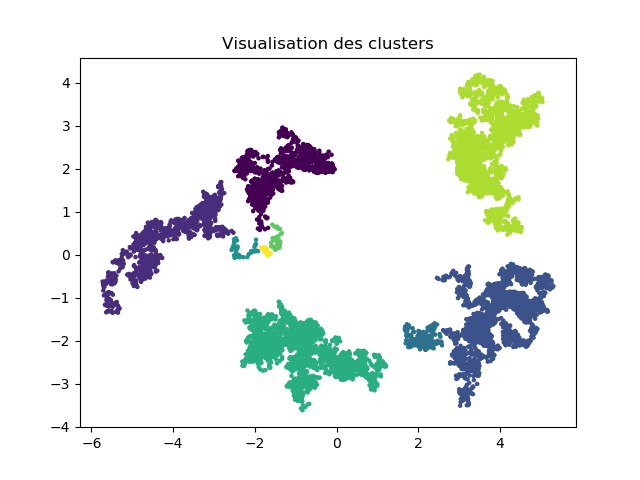

In [162]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=cdbw_n_clusters_agg(2,9,data4), linkage='single').fit_predict(data4)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data4, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data4,pred)

## Clustering DBSCAN

<IPython.core.display.Javascript object>


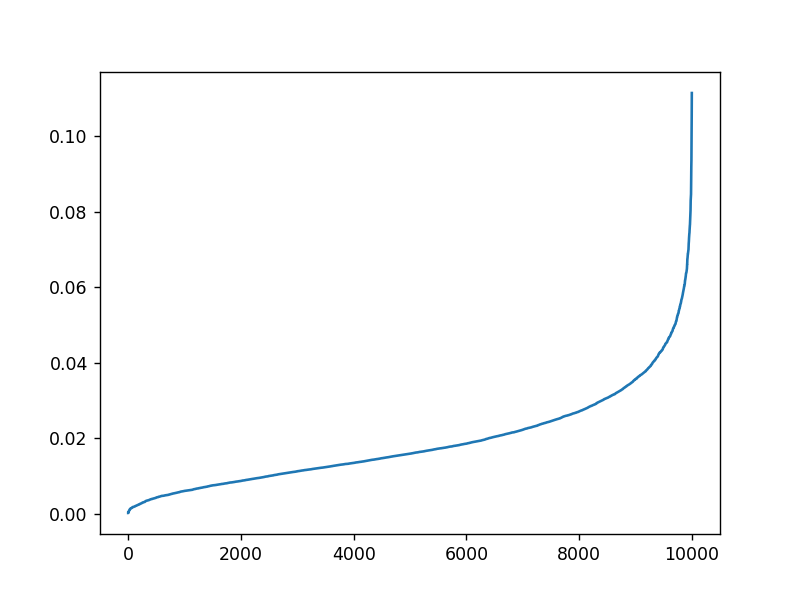

In [10]:
det_eps(data4)

runtime =  94.15 ms
CDbw index score:  0.14792089656647295


<IPython.core.display.Javascript object>


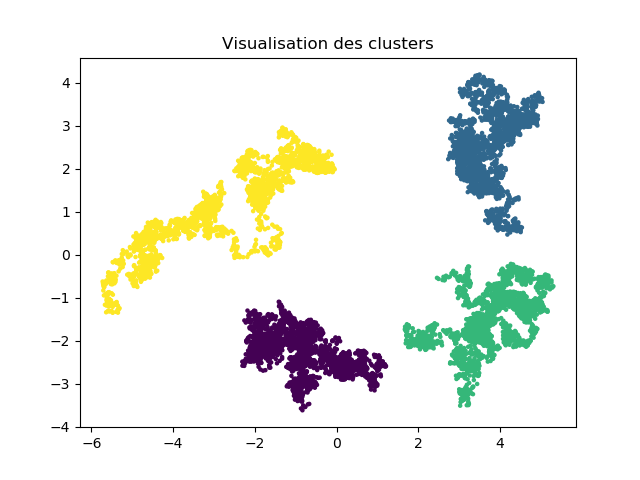

In [163]:
tps1=time.time()
pred=cluster.DBSCAN(eps=0.2, min_samples=2).fit_predict(data4)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data4, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data4,pred)

## Clustering HDBSCAN

runtime =  304.23 ms
CDbw index score:  0.07184157990282149


<IPython.core.display.Javascript object>


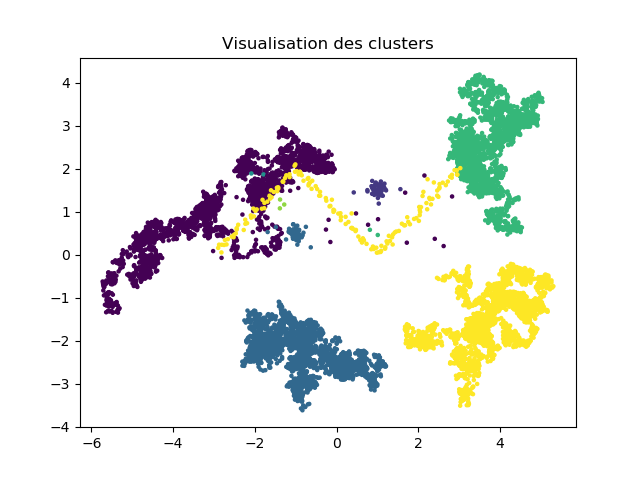

In [189]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=0.2).fit_predict(data4)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data4, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data4,pred)

# Jeu de données zgn.data

## Visualisation

<IPython.core.display.Javascript object>


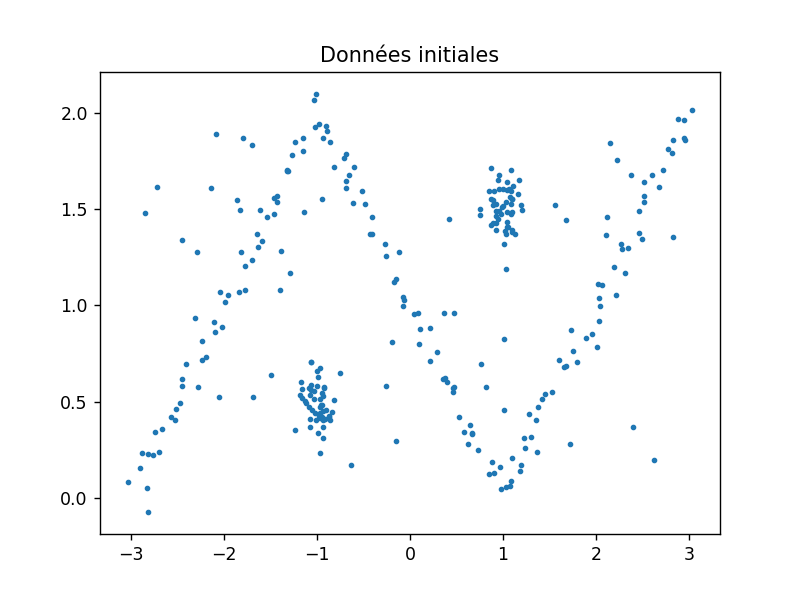

In [12]:
data5=load_data("zgn.data",sep=" ")
visualise_data(data5)

## Clustering k-Means

runtime =  281.25 ms
CDbw index score:  0.31071330692429927


<IPython.core.display.Javascript object>


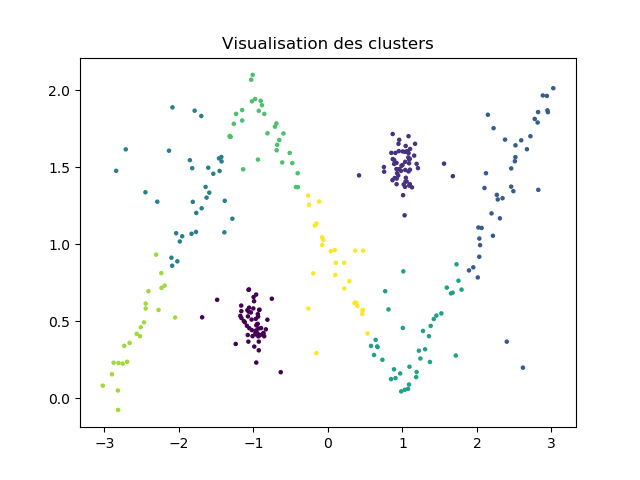

In [139]:
tps1= time.time()
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data5,metric="cdbw"),init='k-means++').fit_predict(data5)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data5, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data5,pred)

## Clustering hiérarchique (agglomératif linkage single)

runtime =  77.82 ms
CDbw index score:  4.291054775175933


<IPython.core.display.Javascript object>


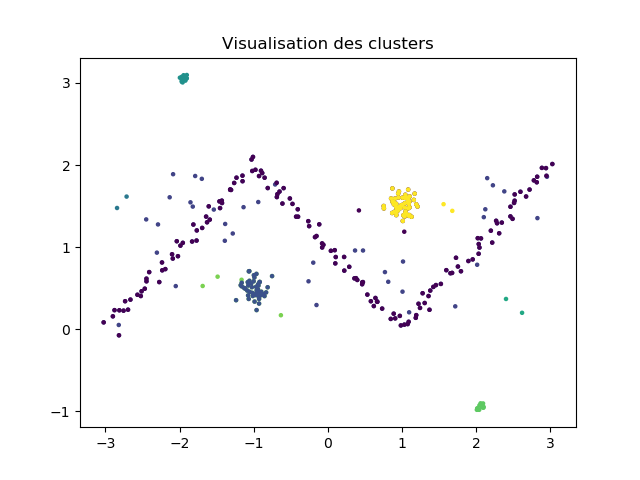

In [146]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=cdbw_n_clusters_agg(2,9,data5), linkage='single').fit_predict(data5)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data5, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data5,pred)

<IPython.core.display.Javascript object>


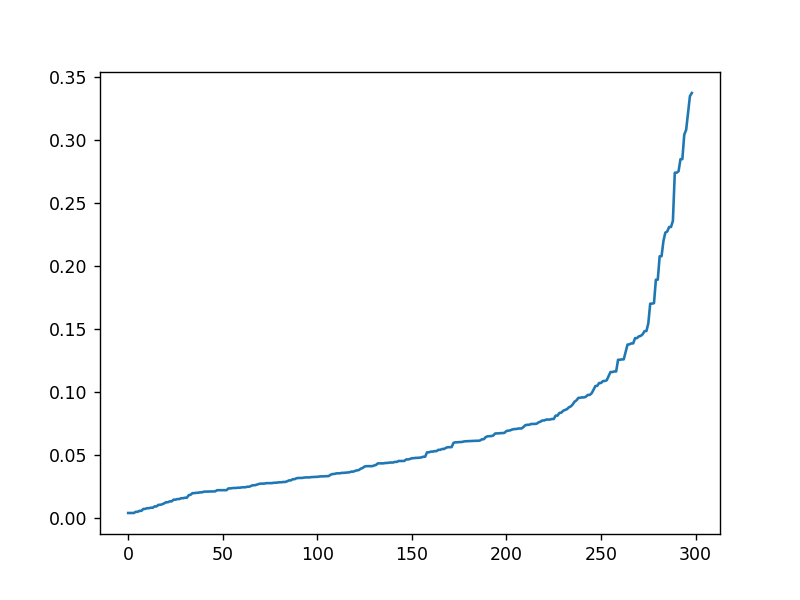

In [13]:
det_eps(data5)

runtime =  1.99 ms
CDbw index score:  0.1363545365948095


<IPython.core.display.Javascript object>


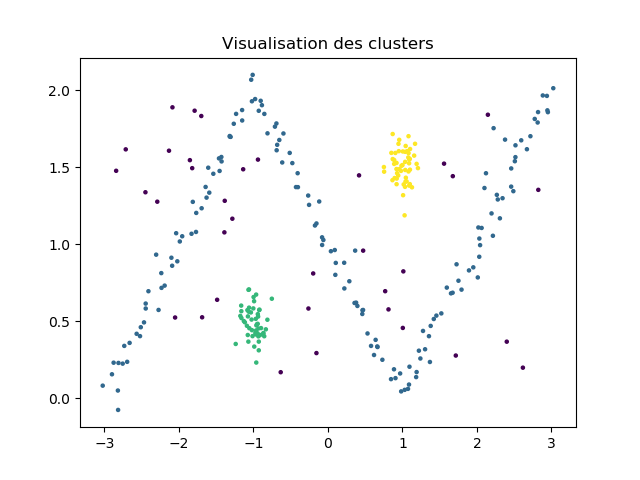

In [166]:
tps1=time.time()
pred=cluster.DBSCAN(eps=0.2, min_samples=4).fit_predict(data5)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data5, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data5,pred)

## Clustering HDBSCAN

runtime =  9.97 ms
CDbw index score:  0.16517502792700112


<IPython.core.display.Javascript object>


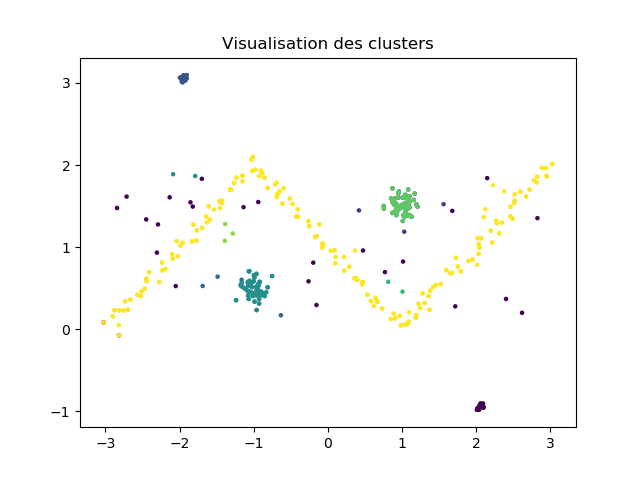

In [191]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=0.2).fit_predict(data5)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data5, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data5,pred)

## Jeu de données zgo.data

<IPython.core.display.Javascript object>


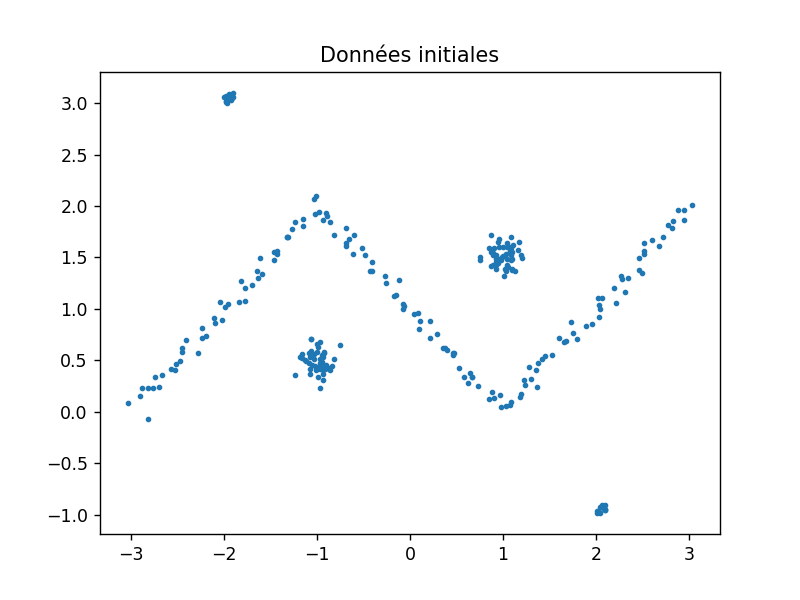

In [30]:
data6=load_data("zgo.data",sep=" ")
visualise_data(data6)

## Clustering k-Means

runtime =  295.24 ms
CDbw index score:  2.289660137077841


<IPython.core.display.Javascript object>


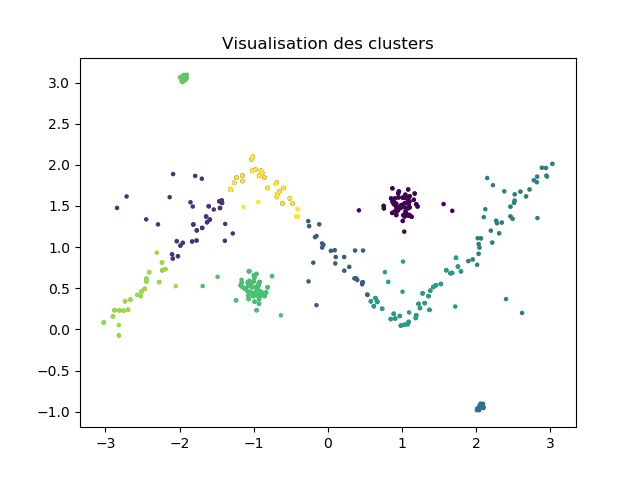

In [137]:
tps1= time.time()
pred = cluster.KMeans(n_clusters=sil_n_clusters(2,9,data6,metric="cdbw"),init='k-means++').fit_predict(data6)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data6, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data6,pred)

## Clustering hiérarchique (agglomératif linkage single)

runtime =  106.72 ms
CDbw index score:  14.14541986377697


<IPython.core.display.Javascript object>


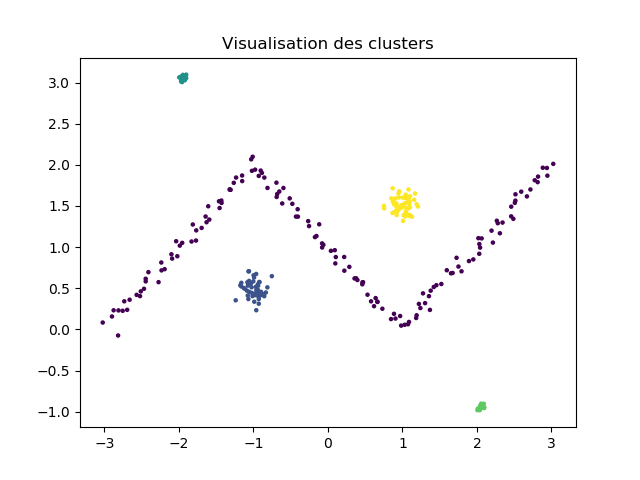

In [148]:
tps1=time.time()
pred=cluster.AgglomerativeClustering(n_clusters=cdbw_n_clusters_agg(2,9,data6), linkage='single').fit_predict(data6)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data6, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data6,pred)

## Clustering DBSCAN

<IPython.core.display.Javascript object>


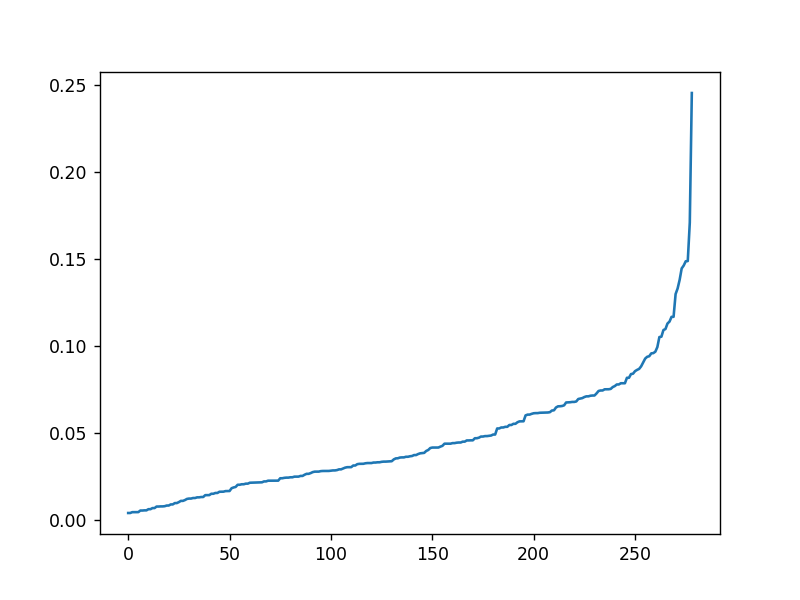

In [33]:
det_eps(data6)

runtime =  -61183.13 ms
CDbw index score:  0


<IPython.core.display.Javascript object>


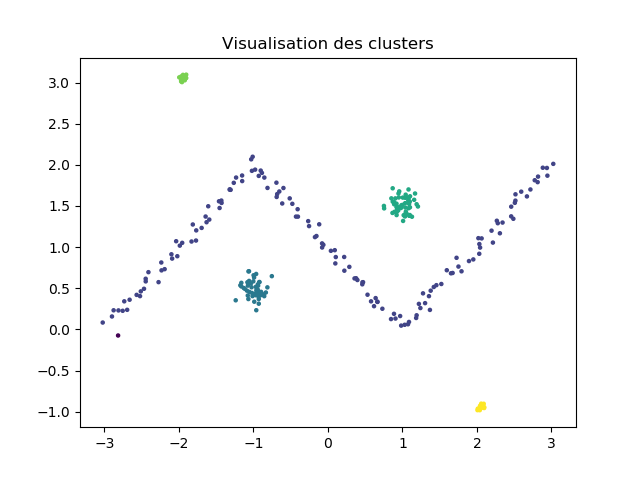

In [167]:
tps1=time.time()
pred=cluster.DBSCAN(eps=0.2, min_samples=4).fit_predict(data6)
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
tps2=time.time()
print("CDbw index score: ",CDbw(data6, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_predict(data6,pred)

## Clustering HDBSCAN

In [194]:
tps1=time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=0.2).fit_predict(data6)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print("CDbw index score: ",CDbw(data6, pred, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False))
visualise_pred(data6,pred)

runtime =  9.97 ms
CDbw index score:  0.7631939431504663


<IPython.core.display.Javascript object>